In [1]:
rm(list=ls())
library(ggplot2)


In [6]:
hk=read.table("parsed_HealthKitData.Steps.tsv",header=TRUE,sep='\t')
cm=read.table("parsed_motionActivity.txt",header=TRUE,sep='\t')

In [7]:
head(hk)

,Subject,Date,WeekDay,Metric,Value,Source,SourceBlobs
,<fct>,<fct>,<dbl>,<fct>,<dbl>,<fct>,<fct>
1,63e84d20-0104-49cf-8c68-7b05a2a80ff8,2010-05-08,5,HKQuantityTypeIdentifierStepCount,56,"((null), com.apple.health.4DE8CF82-296B-4A76-917F-C06113280981)",4915985
2,49694001-6bc7-44dc-a03c-eecf99364a13,2012-07-01,6,HKQuantityTypeIdentifierStepCount,943,"(Sync Solver, com.redshiftdev.Fitbit-Health-Sync)",4481213
3,49694001-6bc7-44dc-a03c-eecf99364a13,2012-07-02,0,HKQuantityTypeIdentifierStepCount,4016,"(Sync Solver, com.redshiftdev.Fitbit-Health-Sync)",4484376
4,49694001-6bc7-44dc-a03c-eecf99364a13,2012-07-03,1,HKQuantityTypeIdentifierStepCount,3640,"(Sync Solver, com.redshiftdev.Fitbit-Health-Sync)",4481213
5,49694001-6bc7-44dc-a03c-eecf99364a13,2012-07-05,3,HKQuantityTypeIdentifierStepCount,3762,"(Sync Solver, com.redshiftdev.Fitbit-Health-Sync)",4484376
6,49694001-6bc7-44dc-a03c-eecf99364a13,2012-07-07,5,HKQuantityTypeIdentifierStepCount,3400,"(Sync Solver, com.redshiftdev.Fitbit-Health-Sync)",4484376


In [8]:
head(cm)

,Subject,Date,Weekday,Activity,Duration_in_Minutes,Fraction,Numentries,SourceBlobs
,<fct>,<fct>,<int>,<fct>,<dbl>,<dbl>,<int>,<fct>
1,c7cebbb5-d264-4850-97c8-99f996b93157,1969-12-31,2,stationary,3.066667,1.000000000,32,4872372
2,87bef569-eb67-4c5b-a58a-14776a5ce54a,2015-05-05,1,automotive,30.366667,0.270728083,218,4861123
3,87bef569-eb67-4c5b-a58a-14776a5ce54a,2015-05-05,1,not available,0.250000,0.002228826,218,4861123
4,87bef569-eb67-4c5b-a58a-14776a5ce54a,2015-05-05,1,stationary,65.700000,0.585735513,218,4861123
5,87bef569-eb67-4c5b-a58a-14776a5ce54a,2015-05-05,1,walking,15.850000,0.141307578,218,4861123
6,87bef569-eb67-4c5b-a58a-14776a5ce54a,2015-05-06,2,automotive,291.483333,0.368561915,1482,4861123


In [9]:
#filter to dates of interest 
hk$Date=strptime(hk$Date,"%Y-%m-%d")

In [10]:
cm$Date=strptime(cm$Date,"%Y-%m-%d")

In [15]:
hk_subset=hk[(hk$Date>strptime("2019-10-01","%Y-%m-%d")),]
hk_subset=hk_subset[hk_subset$Date<strptime("2020-05-06","%Y-%m-%d"),]

In [18]:
cm_subset=cm[(cm$Date>strptime("2019-10-01","%Y-%m-%d")),]
cm_subset=cm_subset[cm_subset$Date<strptime("2020-05-06","%Y-%m-%d"),]

In [23]:
hk_subset$Date=as.POSIXct(hk_subset$Date)
cm_subset$Date=as.POSIXct(cm_subset$Date)


In [29]:
hk_subset=hk_subset[hk_subset$Value<50000,]

In [24]:
nrow(cm_subset)

[1] 484947

In [56]:
options(repr.plot.width=20, repr.plot.height=10)

p1=ggplot(data=tmp,aes(x=hk_subset$Date,y=tmp$Value,group=tmp$Date))+geom_boxplot()+xlab("Date")+ylab("HK Steps")

In [45]:
median(na.omit(hk_subset$Value))

[1] 4093

In [52]:
mean(na.omit(hk_subset$Value))

[1] 7737.253

In [53]:
tmp=hk_subset[hk_subset$Date>strptime("2020-03-01","%Y-%m-%d"),]
tmp=tmp[tmp$Date<strptime("2020-03-01","%Y-%m-%d"),]


In [54]:
mean(na.omit(tmp$Value))

[1] NaN

In [55]:
median(na.omit(tmp$Value))

[1] NA

Warning message:
“Use of `tmp$Value` is discouraged. Use `Value` instead.”
Warning message:
“Use of `tmp$Date` is discouraged. Use `Date` instead.”
ERROR while rich displaying an object: Error: Aesthetics must be either length 1 or the same as the data (27): x

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(

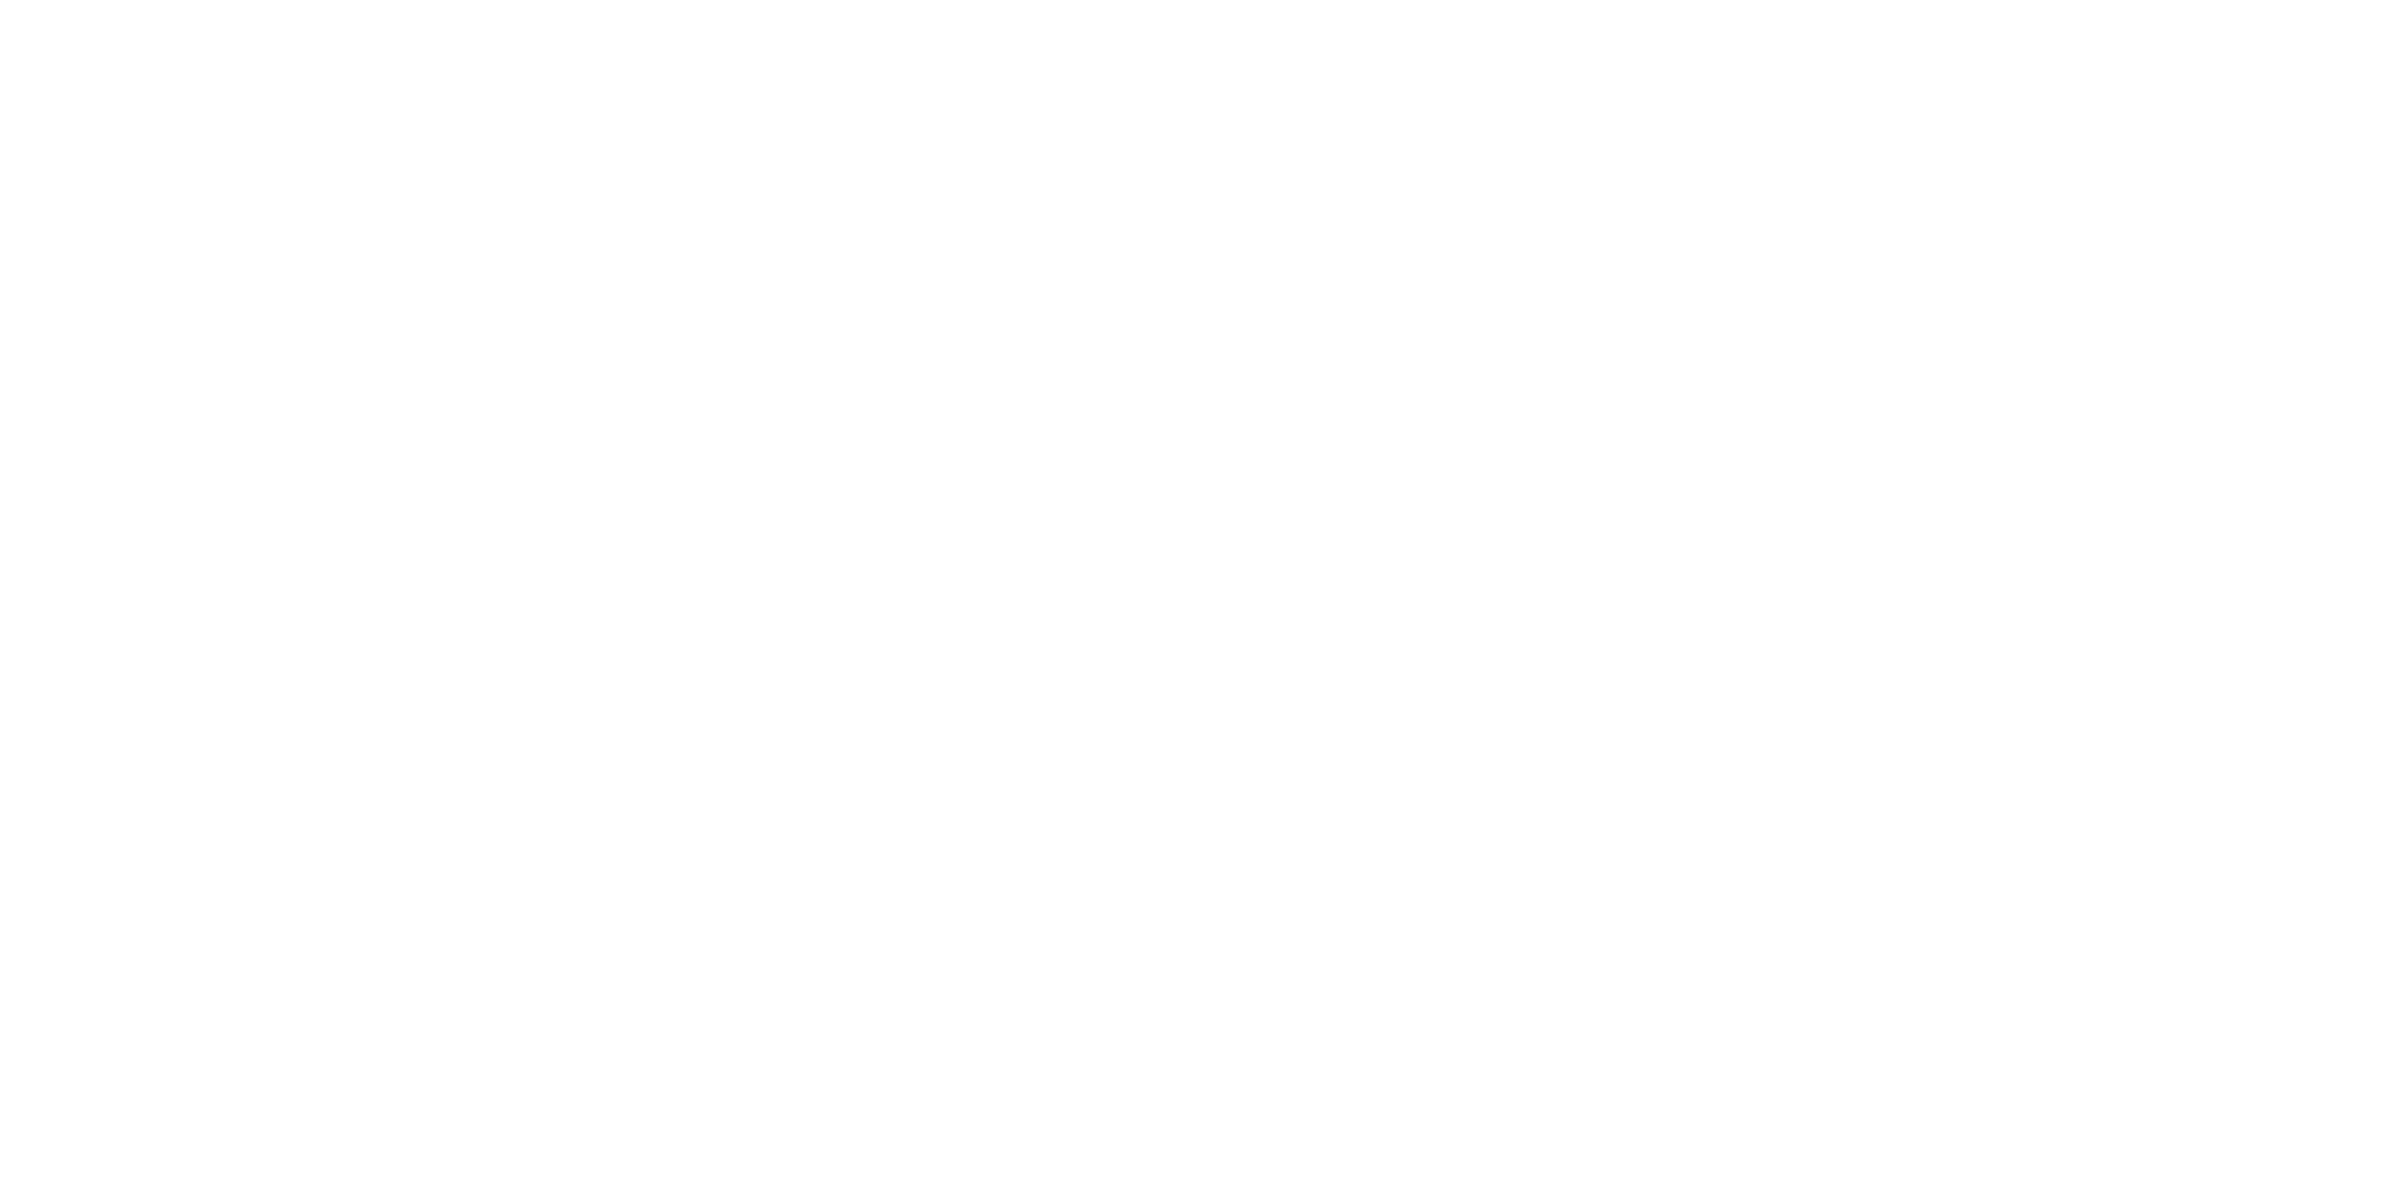

In [57]:
p1

In [37]:
cm_subset=cm_subset[cm_subset$Activity=="walking",]

In [40]:
options(repr.plot.width=20, repr.plot.height=10)

p2=ggplot(data=cm_subset,aes(x=cm_subset$Date,y=cm_subset$Fraction,group=cm_subset$Date))+geom_boxplot()+xlab("Date")+ylab("Minutes Walking")

Warning message:
“Use of `cm_subset$Date` is discouraged. Use `Date` instead.”
Warning message:
“Use of `cm_subset$Fraction` is discouraged. Use `Fraction` instead.”
Warning message:
“Use of `cm_subset$Date` is discouraged. Use `Date` instead.”


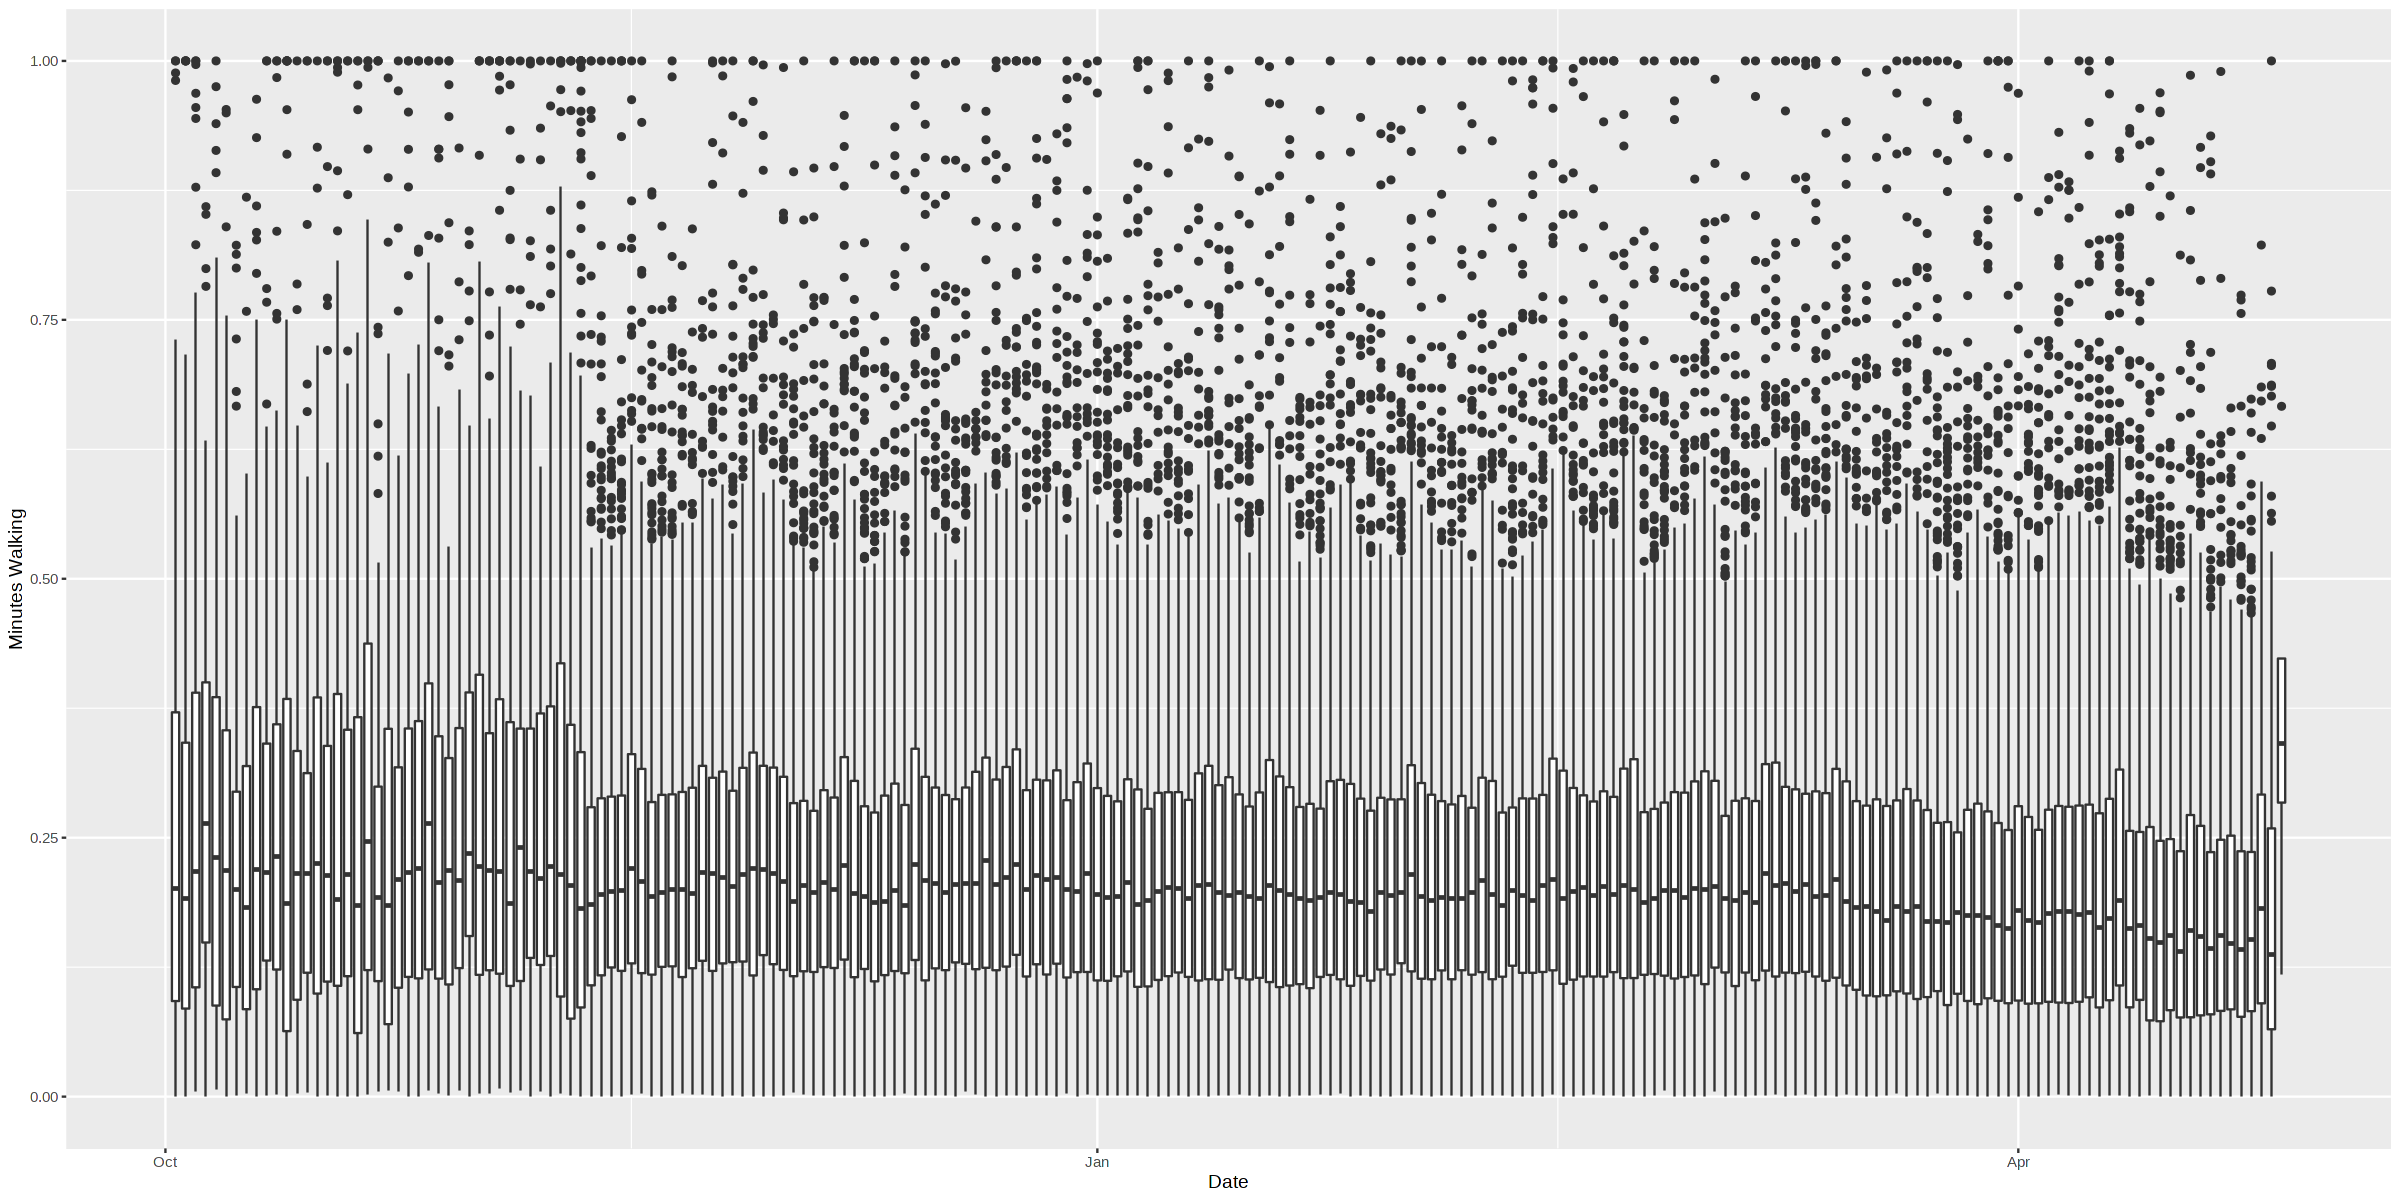

In [41]:
p2

In [42]:
p3=ggplot(data=cm_subset,aes(x=cm_subset$Date,y=cm_subset$Duration_in_Minutes,group=cm_subset$Date))+geom_boxplot()+xlab("Date")+ylab("Minutes Walking")

Warning message:
“Use of `cm_subset$Date` is discouraged. Use `Date` instead.”
Warning message:
“Use of `cm_subset$Duration_in_Minutes` is discouraged. Use `Duration_in_Minutes` instead.”
Warning message:
“Use of `cm_subset$Date` is discouraged. Use `Date` instead.”


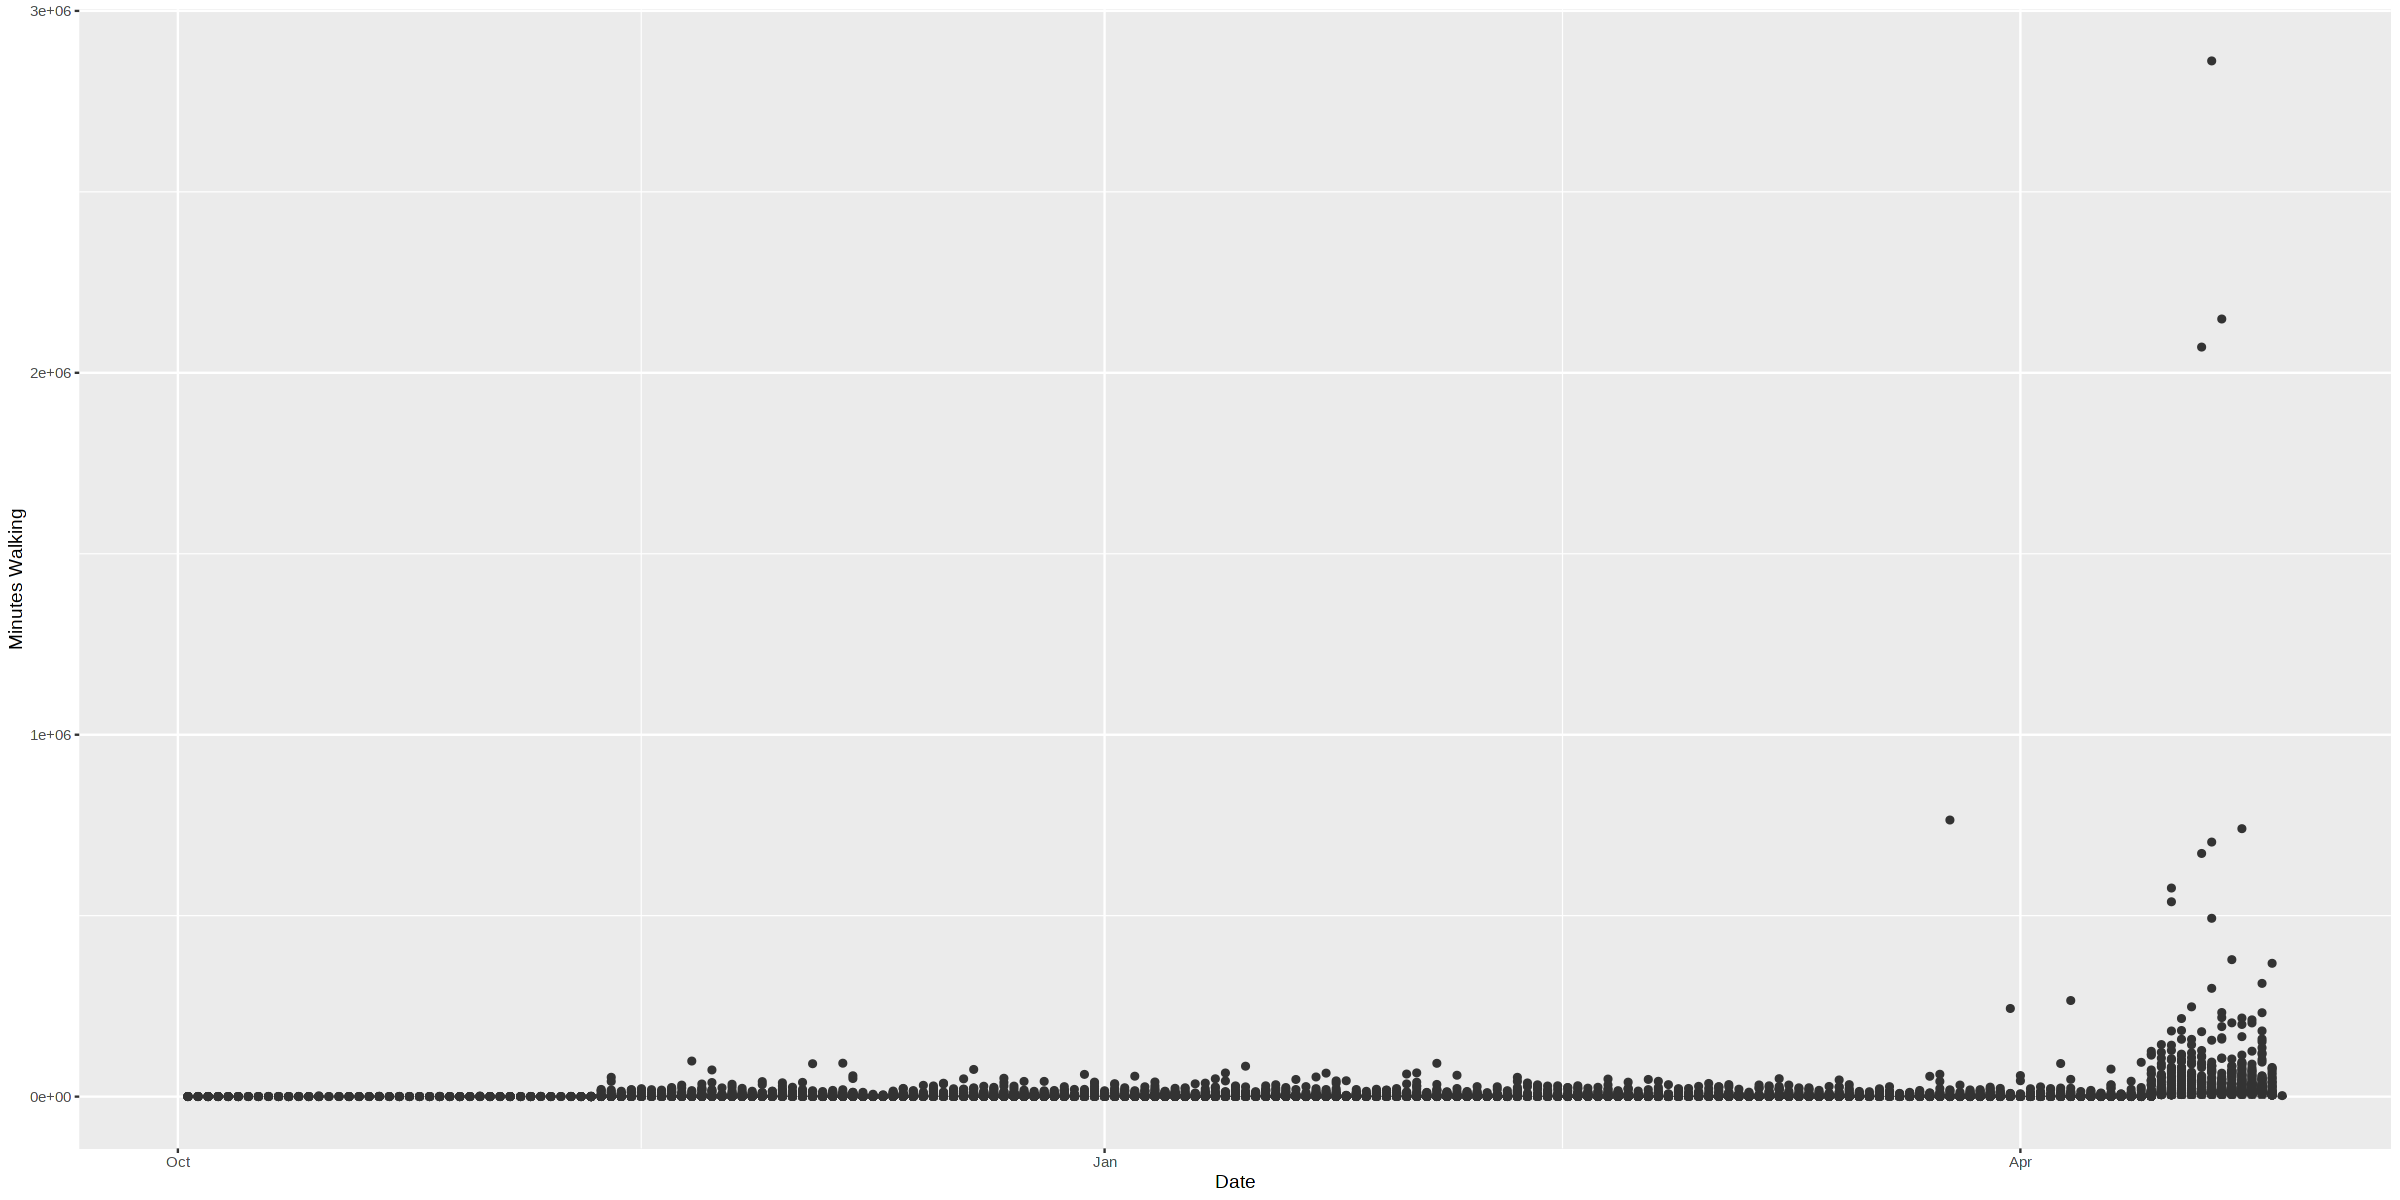

In [43]:
p3